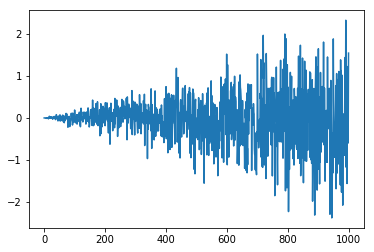

In [68]:
% matplotlib inline
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import numpy as np
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.001) for i in range(0,1000)]
# plot
plt.plot(data)
plt.show()

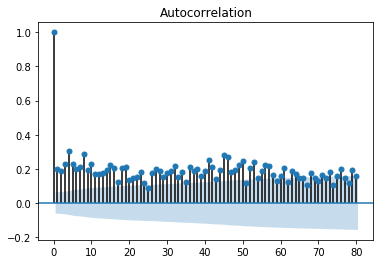

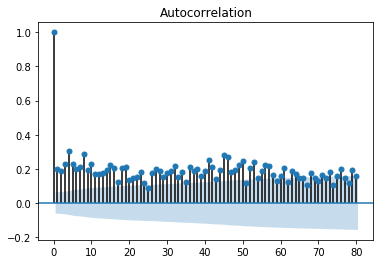

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
#squared_data = [x**2 for x in data]
# create acf plot
plot_acf(np.array(data)**2,lags=80)

In [47]:
from arch import arch_model

In [43]:
data = [gauss(0, i*0.001) for i in range(0,1000)]

In [69]:
am = arch_model(data,mean='Zero', vol='ARCH', p=10)

In [70]:
model_fit = am.fit()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 596.8314547787788
Iteration:      2,   Func. Count:     27,   Neg. LLF: 589.705636423683
Iteration:      3,   Func. Count:     41,   Neg. LLF: 583.7062530666626
Iteration:      4,   Func. Count:     55,   Neg. LLF: 578.4168064068317
Iteration:      5,   Func. Count:     69,   Neg. LLF: 573.4603394529798
Iteration:      6,   Func. Count:     83,   Neg. LLF: 567.5589641641011
Iteration:      7,   Func. Count:     97,   Neg. LLF: 562.9472624138027
Iteration:      8,   Func. Count:    111,   Neg. LLF: 559.5969443576998
Iteration:      9,   Func. Count:    125,   Neg. LLF: 555.1234792552341
Iteration:     10,   Func. Count:    139,   Neg. LLF: 549.6629895231705
Iteration:     11,   Func. Count:    153,   Neg. LLF: 546.2551530059998
Iteration:     12,   Func. Count:    167,   Neg. LLF: 538.123410130368
Iteration:     13,   Func. Count:    181,   Neg. LLF: 535.3522375957211
Iteration:     14,   Func. Count:    195,   Neg. LLF: 525.19166567

In [71]:
yhat = model_fit.forecast(horizon=20)

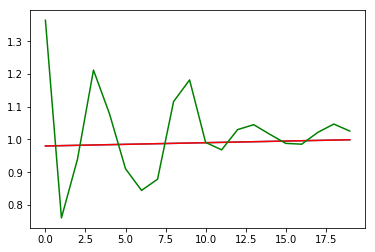

In [72]:
var = [i*0.001 for i in range(0,1000)]
plt.plot(var[-20:])

plt.plot(var[-20:],c='r')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :],'g')


In [73]:
print(model_fit.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -483.999
Distribution:                  Normal   AIC:                           989.998
Method:            Maximum Likelihood   BIC:                           1043.98
                                        No. Observations:                 1000
Date:                Sat, Sep 26 2020   Df Residuals:                      989
Time:                        11:00:52   Df Model:                           11
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3728e-04  1.100e-04      1.249      0.212 